In [1]:

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()


In [2]:
df=pd.read_csv(r'C:\Users\thoma\OneDrive\Desktop\pga08 0nline\heart_2020.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.shape

(319795, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [5]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df=df.drop_duplicates()

In [8]:
num_list=df.select_dtypes(include=np.number)
num_list


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.0,30.0,5.0
1,20.34,0.0,0.0,7.0
2,26.58,20.0,30.0,8.0
3,24.21,0.0,0.0,6.0
4,23.71,28.0,0.0,8.0
...,...,...,...,...
319790,27.41,7.0,0.0,6.0
319791,29.84,0.0,0.0,5.0
319792,24.24,0.0,0.0,6.0
319793,32.81,0.0,0.0,12.0


In [9]:
cat_list=df.select_dtypes(include=object)
cat_list

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,Yes,No,No,Yes,Male,60-64,Hispanic,Yes,No,Fair,Yes,No,No
319791,No,Yes,No,No,No,Male,35-39,Hispanic,No,Yes,Very good,Yes,No,No
319792,No,No,No,No,No,Female,45-49,Hispanic,No,Yes,Good,No,No,No
319793,No,No,No,No,No,Female,25-29,Hispanic,No,No,Good,No,No,No


### EDA


C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\thoma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

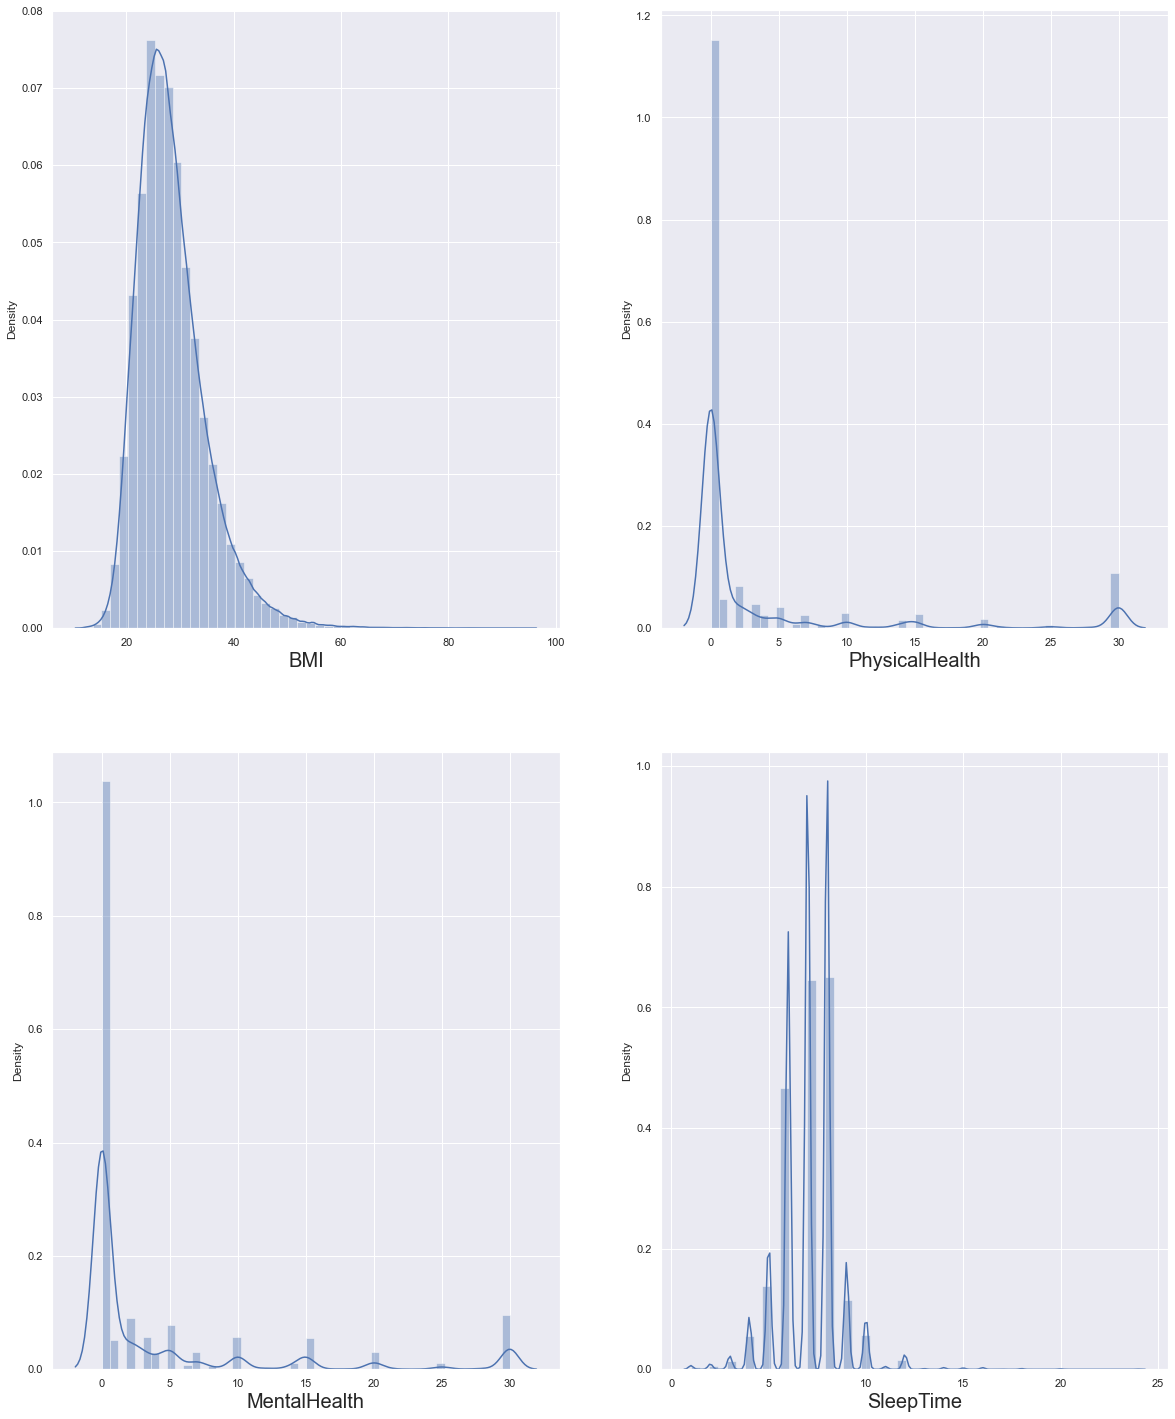

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in num_list:
    if plotnumber<=4 :     # as there are 9 columns in the data
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(num_list[column])
        plt.xlabel(column,fontsize=20)
       
    plotnumber+=1
plt.show()

BMI donot have any visible relation with heart disease

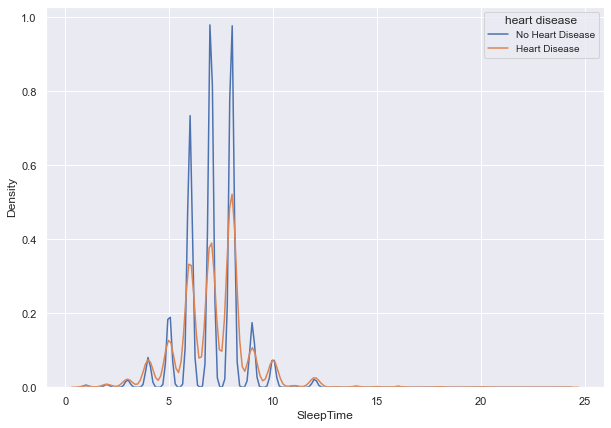

In [11]:
plt.figure(figsize=(10,7))
sns.kdeplot(df[df['HeartDisease']=='No']['SleepTime'], label='No Heart Disease')
sns.kdeplot(df[df['HeartDisease']=='Yes']['SleepTime'], label='Heart Disease')
plt.legend(title= 'heart disease' , fontsize=10)
plt.show()

if the sleeping time is between 7-8 hours there is very less chance of having heart disease

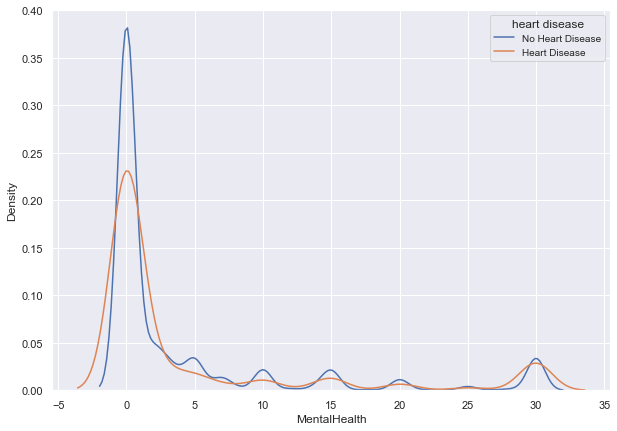

In [12]:
plt.figure(figsize=(10,7))
sns.kdeplot(df[df['HeartDisease']=='No']['MentalHealth'], label='No Heart Disease')
sns.kdeplot(df[df['HeartDisease']=='Yes']['MentalHealth'], label='Heart Disease')
plt.legend(title= 'heart disease' , fontsize=10)
plt.show()

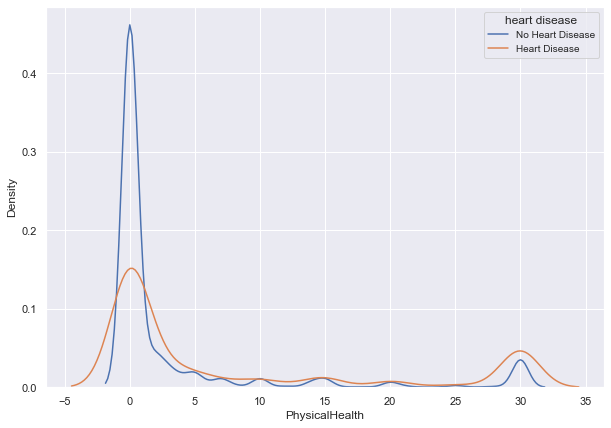

In [13]:
plt.figure(figsize=(10,7))
sns.kdeplot(df[df['HeartDisease']=='No']['PhysicalHealth'], label='No Heart Disease')
sns.kdeplot(df[df['HeartDisease']=='Yes']['PhysicalHealth'], label='Heart Disease')
plt.legend(title= 'heart disease' , fontsize=10)
plt.show()

In [14]:
cat_list.columns

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

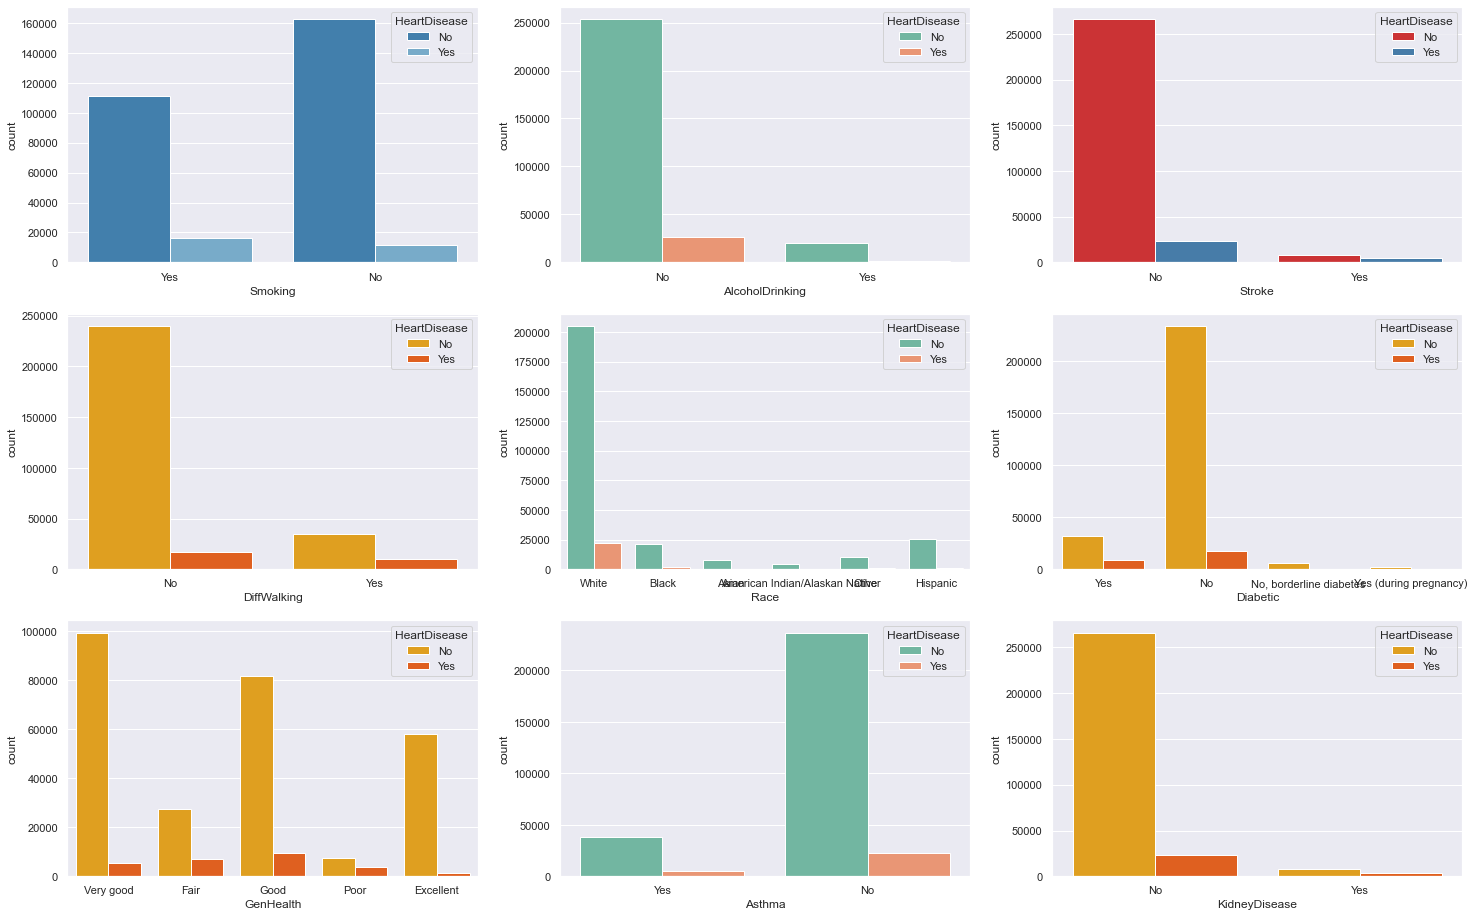

In [15]:
fig, ax = plt.subplots(3, 3, figsize = (25, 16))

sns.countplot(x = 'Smoking', hue = 'HeartDisease', data = df, palette = 'tab20c', ax = ax[0][0])

sns.countplot(x = 'AlcoholDrinking', hue = 'HeartDisease', data = df, palette = 'Set2', ax = ax[0][1])

sns.countplot(x = 'Stroke', hue = 'HeartDisease', data = df, palette = 'Set1', ax = ax[0][2])

sns.countplot(x = 'DiffWalking', hue = 'HeartDisease', data = df, palette = 'autumn_r', ax = ax[1][0])

sns.countplot(x = 'Race', hue = 'HeartDisease', data = df, palette = 'Set2', ax = ax[1][1])

sns.countplot(x = 'Diabetic', hue = 'HeartDisease', data = df, palette = 'autumn_r', ax = ax[1][2])

sns.countplot(x = 'GenHealth', hue = 'HeartDisease', data = df, palette = 'autumn_r', ax = ax[2][0])

sns.countplot(x = 'Asthma', hue = 'HeartDisease', data = df, palette = 'Set2', ax = ax[2][1])

sns.countplot(x = 'KidneyDisease', hue = 'HeartDisease', data = df, palette = 'autumn_r', ax = ax[2][2])

plt.show()

<AxesSubplot:>

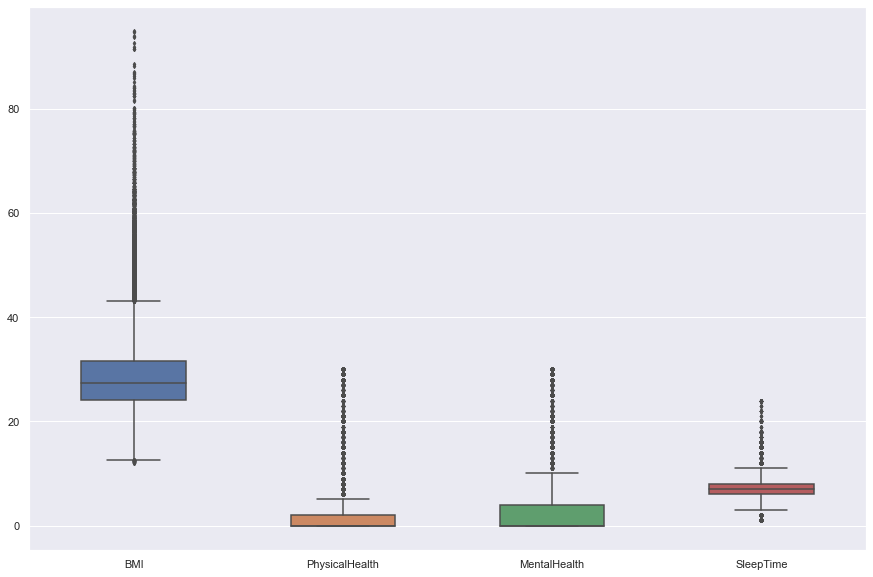

In [16]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=num_list, width= 0.5,ax=ax,  fliersize=3)

In [17]:
df['HeartDisease'].value_counts()

No     274456
Yes     27261
Name: HeartDisease, dtype: int64

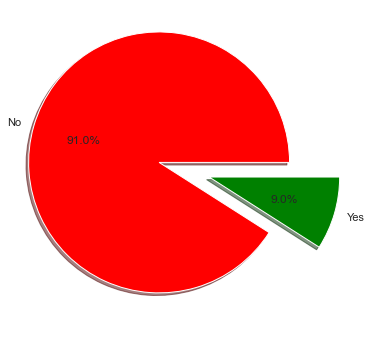

In [18]:
plt.figure(figsize=(10,6))
labels=['No','Yes']
explode=[.2,.2]
mycolors = ["red", "green"]
sizes=df.HeartDisease.value_counts().values
plt.pie(sizes,explode,labels,autopct="%1.1f%%",shadow = True, colors = mycolors)
plt.show()

this is imbalance data set. 91% showing that no heart disease and 9% is showing that there is heart disease

### feature engg

In [19]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [20]:
df['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [21]:
df['Diabetic']=df['Diabetic'].replace({'No, borderline diabetes':'No', 'Yes (during pregnancy':'Yes'})

In [22]:
df['Diabetic'].value_counts()

No                        258572
Yes                        40589
Yes (during pregnancy)      2556
Name: Diabetic, dtype: int64

In [23]:
# handling categorical data

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in cat_list:
    df[i] = le.fit_transform(df[i])

In [24]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


### FEATURE SELECTION

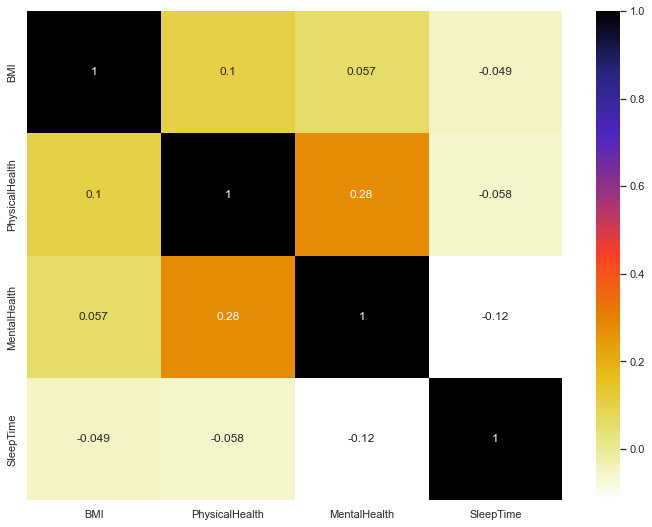

In [25]:
# Analyze the relation between dependent and independent variable using Correlation Matrix / Heatmap

plt.figure(figsize = (12, 9))
cor = num_list.corr()
sns.heatmap(cor, annot = True, cmap = 'CMRmap_r')
plt.show()

In [26]:
## Chi-Square Test

from sklearn.feature_selection import chi2

In [27]:
data=df[['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']]


In [28]:
x1 = data.drop('HeartDisease', axis = 'columns')
y1 = df['HeartDisease']

In [29]:
f_score= chi2(x1,y1)

In [30]:
f_score

(array([ 1904.39274904,   368.90035477, 10976.2461271 ,  9929.23023591,
          884.65940846, 34092.03788846,   192.63950204,  6748.71150317,
          624.65794113,    46.33743271,   331.7285174 ,  5901.80264647,
         2238.35921382]),
 array([0.00000000e+000, 3.24804402e-082, 0.00000000e+000, 0.00000000e+000,
        2.12184054e-194, 0.00000000e+000, 8.43733155e-044, 0.00000000e+000,
        7.25567772e-138, 9.95439282e-012, 4.03940031e-074, 0.00000000e+000,
        0.00000000e+000]))

In [31]:
p_value = pd.Series(f_score[1], index = x1.columns)
p_value = p_value.sort_values(ascending = True)
p_value

Smoking              0.000000e+00
Stroke               0.000000e+00
DiffWalking          0.000000e+00
AgeCategory          0.000000e+00
Diabetic             0.000000e+00
KidneyDisease        0.000000e+00
SkinCancer           0.000000e+00
Sex                 2.121841e-194
PhysicalActivity    7.255678e-138
AlcoholDrinking      3.248044e-82
Asthma               4.039400e-74
Race                 8.437332e-44
GenHealth            9.954393e-12
dtype: float64

In [32]:
cols = []

for i in p_value.index:
    if p_value[i] <= 0.05:
        print(i, ' :- Reject Null Hypothesis')
    else:
        print(i, ' :- Accept Null Hypothesis')
        cols.append(i)

Smoking  :- Reject Null Hypothesis
Stroke  :- Reject Null Hypothesis
DiffWalking  :- Reject Null Hypothesis
AgeCategory  :- Reject Null Hypothesis
Diabetic  :- Reject Null Hypothesis
KidneyDisease  :- Reject Null Hypothesis
SkinCancer  :- Reject Null Hypothesis
Sex  :- Reject Null Hypothesis
PhysicalActivity  :- Reject Null Hypothesis
AlcoholDrinking  :- Reject Null Hypothesis
Asthma  :- Reject Null Hypothesis
Race  :- Reject Null Hypothesis
GenHealth  :- Reject Null Hypothesis


In [33]:
df.drop(['BMI'], axis=1 , inplace=True)

In [34]:
X=df.drop(['HeartDisease'] , axis = 1)
Y=df.HeartDisease

In [35]:

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)
X_train.shape, X_test.shape

((241373, 16), (60344, 16))

### model building and evaluation

In [36]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# create the instance of logistic regression model
model = LogisticRegression()

# fit the model
model.fit(X_train, Y_train)

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
Y_pred = model.predict(X_test)

In [38]:
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.9098004772636882

In [39]:
from sklearn.tree import DecisionTreeClassifier


In [40]:
dt=DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [41]:
y_pred_dt= dt.predict(X_test)

In [42]:
accuracy = accuracy_score(Y_test,y_pred_dt)
accuracy

0.8775188916876574

### balancing the data set

In [43]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

In [44]:
sm = SMOTE(random_state=23)
X_sm, Y_sm = sm.fit_resample(X, Y)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size = 0.2, random_state = 32)

In [46]:
clf1 = LogisticRegression()

# fit the model
clf1.fit(X_train, Y_train)

C:\Users\thoma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
clf2 = DecisionTreeClassifier()

# fit the model
clf2.fit(X_train, Y_train)

DecisionTreeClassifier()

In [48]:
Y_pred_lr1 = clf1.predict(X_test)
Y_pred_dt2 = clf2.predict(X_test)

In [51]:
print("Accuracy Score on test data with Logistic Regression:", accuracy_score(Y_test, Y_pred_lr1))
print("Accuracy Score on test data with Decision Tree:", accuracy_score(Y_test, Y_pred_dt2))

Accuracy Score on test data with Logistic Regression: 0.7273348332619805
Accuracy Score on test data with Decision Tree: 0.8511335999198418


In [58]:
input_data= (17,0,0,0,21,30,0,1,12,5,1,1,4,7,0,0)

input_data_as_array = np.asarray(input_data)
input_data_reshaped = input_data_as_array.reshape(1, -1)

# scale the input data
#scaled_data = scaler.fit_transform(input_data_reshaped)

prediction = clf2.predict(input_data_reshaped)

if prediction[0] == 1:
    print("The person have heart disease")
else:
    print("The person  donot have heart disease")

The person  donot have heart disease


C:\Users\thoma\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
